# Pipelining
1. Pipelining is a technique that are used to chain multiple step so that they work together.
2. In this the output of first step is the input of the next step

# Plan Of Action
1. First we train the end to end machine learning model without using pipeline
2. We can train the model using `columns transformer` and `pipelinng`

In [1]:
import matplotlib.pyplot as plt

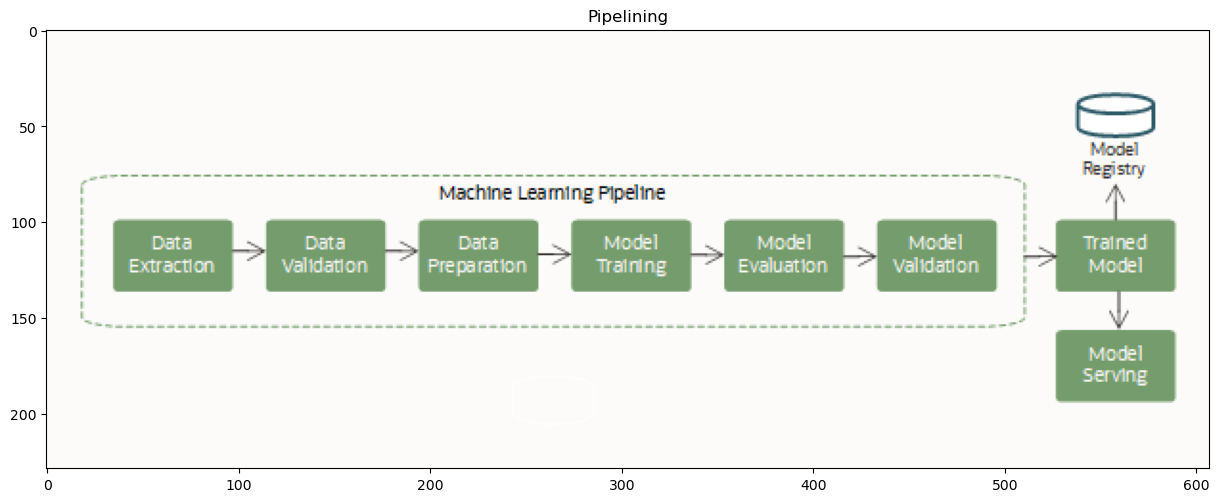

In [2]:
plt.figure(figsize=(15,7))
plt.title("Pipelining")
img=plt.imread('ML_Pipelines.png')
plt.imshow(img)
plt.show()

# Load packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Outline
1. we can train the ML model based on following factor and predict the user feedback and check that weather the feedback is `positive` or `negative`

# Load dataset

In [4]:
df=pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
df.drop(columns=['Unnamed: 12'],inplace=True)

In [6]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


# Without Pipeline

### Basic data preprocessing 

In [7]:
df.shape

(388, 12)

In [8]:
df.duplicated().sum()

103

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
for i in df.describe(include='object').columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print("*"*50)
    print()

Gender
['Female' 'Male']
2
**************************************************

Marital Status
['Single' 'Married' 'Prefer not to say']
3
**************************************************

Occupation
['Student' 'Employee' 'Self Employeed' 'House wife']
4
**************************************************

Monthly Income
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
5
**************************************************

Educational Qualifications
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
5
**************************************************

Output
['Yes' 'No']
2
**************************************************

Feedback
['Positive' 'Negative ']
2
**************************************************



# Extract onlt digit form `monthly income`

In [12]:
def extract_digit(value):
    nbr="".join(filter(str.isdigit,str(value)))
    
    if(nbr):
        return int(nbr)
    else:
        return 0

# Test the fun

In [13]:
extract_digit("sami")

0

# Apply the fun

In [14]:
df['Monthly Income']=df['Monthly Income'].apply(extract_digit)

In [15]:
df['Monthly Income'].dtype

dtype('int64')

In [16]:
df.describe()

,Age,Monthly Income,Family size,latitude,longitude,Pin code
count,285.000000,2.850000e+02,285.000000,285.000000,285.000000,285.000000
mean,24.677193,5.825082e+08,3.270175,12.973429,77.597593,560037.280702
std,3.040977,9.647721e+08,1.361178,0.043964,0.053557,30.738306
min,18.000000,0.000000e+00,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,0.000000e+00,2.000000,12.943800,77.563500,560010.000000
50%,24.000000,1.000000e+04,3.000000,12.977000,77.587700,560028.000000
75%,26.000000,1.000125e+09,4.000000,12.998000,77.622700,560066.000000
max,33.000000,2.500150e+09,6.000000,13.102000,77.758200,560109.000000


# Saperate feature and label

In [17]:
feature=df.drop(columns=['Feedback'])
label=df['Feedback']

# Encode the target col

In [18]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [19]:
encode=LabelEncoder()
label=encode.fit_transform(label)
label

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

# Train test split

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score

In [21]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [22]:
x_train.shape

(228, 11)

In [23]:
x_test.shape

(57, 11)

# Apply ordinal Encoder

In [24]:
ordi=OrdinalEncoder(categories=[['Uneducated','School','Post Graduate' ,'Graduate' ,'Ph.D']])
x_train['Educational Qualifications']=ordi.fit_transform(x_train[['Educational Qualifications']])
x_test['Educational Qualifications']=ordi.transform(x_test[['Educational Qualifications']])

In [25]:
x_train.head(2)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
293,25,Female,Married,Employee,50000,3.0,1,12.977,77.5773,560009,No
25,25,Male,Single,Student,0,2.0,3,12.982,77.6256,560008,Yes


# conclussion
1. we see that `'Educational Qualifications'` are encoded correctly

# One-Hot-Encoder

In [26]:
ohe=OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')
x_train_encoded_col=ohe.fit_transform(x_train[['Gender', 'Marital Status', 'Occupation', 'Output']])
x_test_encoded_col=ohe.transform(x_test[['Gender', 'Marital Status', 'Occupation', 'Output']])

In [27]:
x_train_encoded_col

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Now Merge
1. We have a encoded col and non encoded col now merge them using `hstack`

In [28]:
new_x_train=np.hstack((x_train.drop(columns=['Gender','Marital Status','Occupation','Output']),x_train_encoded_col))
new_x_test=np.hstack((x_test.drop(columns=['Gender','Marital Status','Occupation','Output']),x_test_encoded_col))

In [29]:
new_x_train.shape

(228, 14)

# fit the model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()
model.fit(new_x_train,y_train)

LogisticRegression()

In [32]:
pre=model.predict(new_x_test)
pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Accuracy Score

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
score=accuracy_score(y_test,pre)
score

0.8771929824561403

In [35]:
cross_val_score(model,new_x_train,y_train,cv=5).mean()

0.7939130434782609

In [36]:
cross_val_score(model,new_x_test,y_test,cv=5).mean()

0.8787878787878787

# Without using `column transformer` and `pipeline` we got `0.8787878787878787` accuracy now use column transformer and pipeline

# `Column Transformer` and `Pipeline`

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Saperate the feature and label

In [38]:
feature=df.drop(columns=['Feedback'])
label=df['Feedback']

# Encode the target col

In [39]:
encode=LabelEncoder()
label=encode.fit_transform(label)
label

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

# Saperate the num and cat col- and ordinary col

In [40]:
nominal_col=feature.drop(columns=['Educational Qualifications']).select_dtypes('object').columns
nominal_col

Index(['Gender', 'Marital Status', 'Occupation', 'Output'], dtype='object')

In [41]:
ordinal_col=np.array(['Educational Qualifications'])
ordinal_col

array(['Educational Qualifications'], dtype='<U26')

In [42]:
num_col=feature.select_dtypes('number').columns
num_col

Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code'],
      dtype='object')

# Build a numerical pipeline

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
num_pipe=Pipeline(steps=[
    ('pipe1',StandardScaler())
])
num_pipe

Pipeline(steps=[('pipe1', StandardScaler())])

# Build a catagorical pipeline

In [45]:
cat_pipe=Pipeline(steps=[
    ('pipe1',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))
])
cat_pipe

Pipeline(steps=[('pipe1',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])

# Build a ordinal pipeline

In [46]:
ordi_pipe=Pipeline(steps=[
    ('pipe1',OrdinalEncoder(categories=[['Uneducated','School','Post Graduate' ,'Graduate' ,'Ph.D']]))
])
ordi_pipe

Pipeline(steps=[('pipe1',
                 OrdinalEncoder(categories=[['Uneducated', 'School',
                                             'Post Graduate', 'Graduate',
                                             'Ph.D']]))])

# Build a Transformer

In [49]:
process=ColumnTransformer(transformers=[
    ('trf1',num_pipe,num_col),
    ('trf2',cat_pipe,nominal_col),
    ('trf3',ordi_pipe,ordinal_col)
],remainder='passthrough')
process

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1',
                                 Pipeline(steps=[('pipe1', StandardScaler())]),
                                 Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code'],
      dtype='object')),
                                ('trf2',
                                 Pipeline(steps=[('pipe1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Gender', 'Marital Status', 'Occupation', 'Output'], dtype='object')),
                                ('trf3',
                                 Pipeline(steps=[('pipe1',
                                                  OrdinalEncoder(categories=[['Uneducated',
                                                                              'School',
                                                                              'Post '
                                                                              'Graduate',
                                                                              'Graduate',
                                                                              'Ph.D']]))]),
                                 array(['Educational Qualifications'], dtype='<U26'))])

# Now Bild a Final pipeline

In [50]:
model=LogisticRegression()

In [51]:
final=Pipeline(steps=[
    ('process',process),
    ('model',model)
])
final

Pipeline(steps=[('process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  Pipeline(steps=[('pipe1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code'],
      dtype='object')),
                                                 ('trf2',
                                                  Pipeline(steps=[('pipe1',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Marital Status', 'Occupation', 'Output'], dtype='object')),
                                                 ('trf3',
                                                  Pipeline(steps=[('pipe1',
                                                                   OrdinalEncoder(categories=[['Uneducated',
                                                                                               'School',
                                                                                               'Post '
                                                                                               'Graduate',
                                                                                               'Graduate',
                                                                                               'Ph.D']]))]),
                                                  array(['Educational Qualifications'], dtype='<U26'))])),
                ('model', LogisticRegression())])

# Train Test split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=32)

In [53]:
x_train.shape

(228, 11)

In [54]:
x_test.shape

(57, 11)

# Fit the `final` pipeline

In [55]:
final.fit(x_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  Pipeline(steps=[('pipe1',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude',
       'Pin code'],
      dtype='object')),
                                                 ('trf2',
                                                  Pipeline(steps=[('pipe1',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Marital Status', 'Occupation', 'Output'], dtype='object')),
                                                 ('trf3',
                                                  Pipeline(steps=[('pipe1',
                                                                   OrdinalEncoder(categories=[['Uneducated',
                                                                                               'School',
                                                                                               'Post '
                                                                                               'Graduate',
                                                                                               'Graduate',
                                                                                               'Ph.D']]))]),
                                                  array(['Educational Qualifications'], dtype='<U26'))])),
                ('model', LogisticRegression())])

# Prediction

In [56]:
final.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

# Accuracy Score

In [57]:
accuracy_score(y_test,pre)

0.8245614035087719

In [58]:
cross_val_score(final,x_train,y_train,cv=5,scoring='accuracy').mean()

0.8073429951690821

In [59]:
cross_val_score(final,x_test,y_test,cv=5,scoring='accuracy').mean()

0.7712121212121212

# Pickle the model

In [62]:
import pickle as pkl

In [64]:
with open('feedback.pkl','wb') as f:
    pkl.dump(final,f)